# 04 matplotlib

Data and model results can be abstract if we can't see how they look. Also, it is easy to get too removed from  calculations and end up with answers that don't make sense. A straight-forward way to investigate information and to have a reality check is by plotting it up. Here we will cover the basics for making a variety of commonly-used plots.

matplotlib provides a [gallery](http://matplotlib.org/gallery.html) of plot examples, as described by text and shown as plots. This is really helpful for finding what you want to do when you don't know how to describe it, and to get ideas for what possibilities are out there.

To produce figures inline in Jupyter notebooks, you need to run the command `%matplotlib inline`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

A quick plot without any setup:

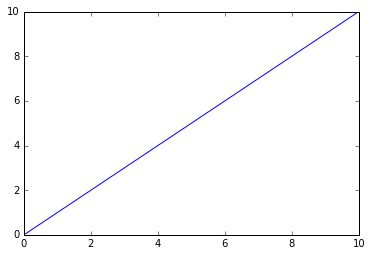

In [47]:
x = np.linspace(0, 10)
plt.plot(x, x)

You can subsequently alter the plot with commands like `plt.xlabel('xlabel')` which act on the active figure, but you can only reference one figure at a time when they are not named.

So, problems with this:

* Less control
* Harder to make changes later
* Overwrites any figure you may already have open

So, don't screw over future you! Set up your plot properly from the beginning

# A. Figure overview

A figure in matplotlib has several basic pieces, as shown in the following image. Note that `axes` refers to the area within a figure that is used for plotting and `axis` refers to a single x- and y-axis.

![fig](http://matplotlib.org/_images/fig_map.png)
http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure


## Figure and axes setup

Steps for setting up a figure:

1. Open a figure, save the object to a variable, and size it as desired.
2. Add axes to the figure. Axes are the objects in which data is actually plotted.
3. Add labels to clearly explain the plot, such as axis labels and a title.

Here is a good way to set up a general figure so that you can easily work with it:

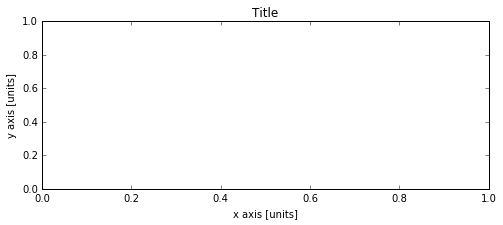

In [80]:
fig = plt.figure(figsize=(8, 3))  # figure size is given as a (width, height) tuple
ax = fig.add_subplot(111)  # 
ax.set_xlabel('x axis [units]')
ax.set_ylabel('y axis [units]')
ax.set_title('Title')

## Useful commands and keyword arguments

These commands and keyword arguments should be frequently used to customize and properly label your figures. Command syntax shown is common usage, not all available options.

### labels and text

`ax.set_xlabel(xlabel, fontsize, color)`, `ax.set_ylabel(ylabel, fontsize, color)`: Label the x and y axis with strings xlabel and ylabel, respectively. This is where you should state what is being plotted, and also give units.

`ax.set_title(Title, fontsize, color)`: Label the top of the axes with a title describing the plot.

[`fig.suptitle(Suptitle, fontsize, color)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.suptitle): Label the overall figure, above any subplot titles.

[`ax.text(x, y, text, color, transform=ax.transAxes)`](http://matplotlib.org/api/text_api.html#matplotlib.text.Text): Write text in your axes. The text will appear at location (x,y) in data coordinates — often it is easier to input the location in units of the axes itself (from 0 to 1), which is done by setting transform=ax.transAxes. The text is input as a string and `color` controls the color of the text.

### [subplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

`fig.add_subplot(nrows, ncols, plot_number)`

Above, we showed an example of adding a single axes to the figure, with the command `fig.add_subplot(111)`. This command can be used to add multiple axes to the figure instead of a single one. These subplots can divide up the available space in the figure only in a simple way, which is enough for most cases.

An example with 1 row and 2 columns of axes is shown, with the `plot_number` increasing from 1 across the rows then columns, up to the number of axes (2, in this case).

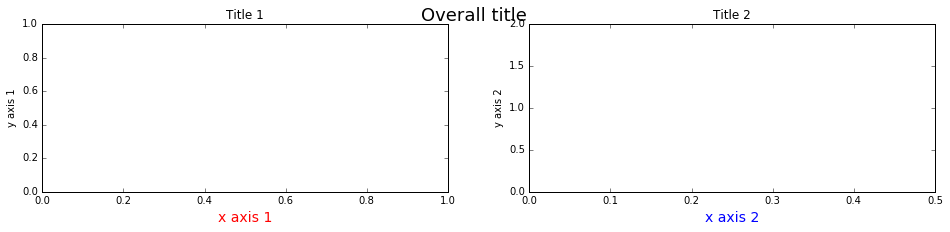

In [81]:
# subplot example
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 2, 1)  # 1st subplot
ax1.set_xlabel('x axis 1', fontsize=14, color='r')
ax1.set_ylabel('y axis 1')
ax1.set_title('Title 1')

ax2 = fig.add_subplot(1, 2, 2)  # 2nd subplot
ax2.set_xlabel('x axis 2', fontsize=14, color='b')
ax2.set_ylabel('y axis 2')
ax2.set_title('Title 2')
ax2.set_xlim(0, 0.5)
ax2.set_ylim(0, 2)

fig.suptitle('Overall title', fontsize=18)
#fig.tight_layout()  # helper function to clean up plot

### [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)

`fig, axes = plt.subplots(nrows, ncols)`

If we want to use many subplots, it is more concise to save the number of axes to an array so that we can loop through them. This function allows us to have subplots with shared x, y, or both axes, which then shares the x and y limits and the ticks and tick labels.

An example with 3 rows and 2 columns of axes is shown. We loop through the axes instead of listing each out
separately. We demonstrate the ability to share the x axis.

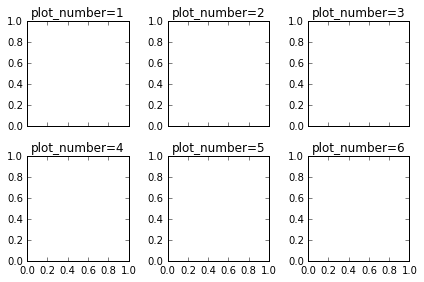

In [82]:
fig, axes = plt.subplots(2, 3, sharex=True)

# loop through axes
for i, ax in enumerate(axes.flat):
    
    ax.set_title('plot_number=' + str(i+1))  # add 1 to plot_number since it starts counting at 1

# make plot look nicer
fig.tight_layout()

### axes layout

[`fig.tight_layout()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.tight_layout): convenience function to automatically improve spacing between subplots (already used above).

[`fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust): Any of the keywords listed may be used to override the default values. In order, the adjust the left, bottom, right, and top of the subplots, the width and height for space between subplots. These values can be altered graphically when using a GUI version of a plot in iPython.

### axis control

`ax.set_xlim(xmin, xmax)`, `ax.set_ylim(ymin, ymax)`: Set the x and y axis limits to xmin, xmax and ymin, ymax, respectively.

#### [axis](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis)

The axis values by default encompass the plotted data comfortably, usually giving some space at the edges, depending on the numbers. However, this can be modified. Common usages:

`axis('equal')`: sets x and y limits so that the increments on both axes are equal lengths.

`axis('tight')`: sets axis limits to just encompass the data, with no extra space on the ends.

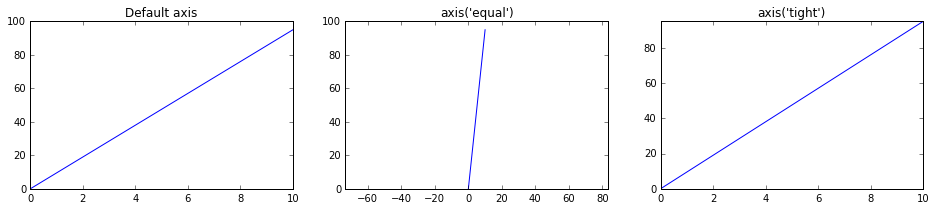

In [70]:
# axis examples
x = np.linspace(0, 10)

fig = plt.figure(figsize=(16, 3))

# No adjustments to axis
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(x, 9.5*x)
ax1.set_title('Default axis')

# Using axis('equal')
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, 9.5*x)
ax2.axis('equal')
ax2.set_title("axis('equal')")

# Using axis('tight')
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(x, 9.5*x)
ax3.axis('tight')
ax3.set_title("axis('tight')")

### [savefig](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig)

`fig.savefig(fname, dpi=None, bbox_inches='tight')`

This is how you can save the figure that you have made. Input a file name, fname and the dots per inch if you want something higher than the default. `bbox_inches='tight'` trims the white space around the figure; alternatively a number can be input to pad the figure if it cuts too close, but the 'tight' option works most of the time.

### Plotting with `datetime` objects

If you want to plot with time, use `datetime` objects to hold the time/dates. Then when you plot, things will work out nicely. In fact, in the following example, the plotted dates will be formatted correctly whether or not you plot with the special function [`plot_date()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot_date). But, to have them be readable, we need to rotate the labels. Two ways to do this are shown.

(array([ 735964.,  735965.,  735966.,  735967.,  735968.,  735969.,
         735970.,  735971.,  735972.,  735973.]),
 <a list of 10 Text xticklabel objects>)

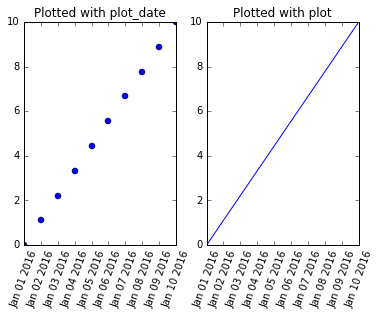

In [57]:
from datetime import datetime, timedelta
dates = []
[dates.append(datetime(2016, 1, 1, 0, 0) + i*timedelta(days=1)) for i in range(10)]
y = np.linspace(0, 10, 10)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot_date(dates, y)
ax1.set_title('Plotted with plot_date')
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=70 )

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(dates, y)
ax2.set_title('Plotted with plot')
plt.xticks(rotation=70)

### Removing offset from axis

By default, matplotlib will format the axis with a relative shift if there is a large difference in the axis value range. Sometimes this is helpful and sometimes it is annoying. We can turn this off with `ax.get_xaxis().get_major_formatter().set_useOffset(False)`.

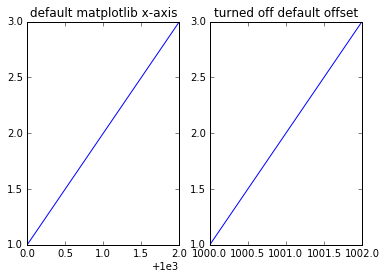

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot([1000, 1001, 1002], [1, 2, 3])
ax1.set_title('default matplotlib x-axis')

ax2 = fig.add_subplot(122)
ax2.plot([1000, 1001, 1002], [1, 2, 3])
ax2.set_title('turned off default offset')
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

### Legends

[`ax.legend([possible sequence of strings], loc)`](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend)

where loc tells where in the axes to place the legend:
'best'         : 0, (only implemented for axes legends)
'upper right'  : 1,
'upper left'   : 2,
'lower left'   : 3,
'lower right'  : 4,
'right'        : 5,
'center left'  : 6,
'center right' : 7,
'lower center' : 8,
'upper center' : 9,
'center'       : 10,

A legend or key for a plot can be produced by matplotlib by either labeling plots as they are plotted and then calling the legend command, or by plotting and then labeling them in order within the legend command.

Note also that when a marker is used for plotting, the legend by default puts two of them in the legend, which is rather ugly. This can be changed by adding `numpoints=1` into the `legend()` call.

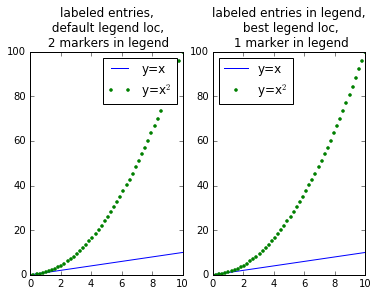

In [63]:
x = np.linspace(0, 10)

fig = plt.figure()

# Using default legend location and labeled plots as they were plotted
ax1 = fig.add_subplot(121)
ax1.plot(x, x, label='y=x')
ax1.plot(x, x**2, '.', label='y=x$^2$')
ax1.legend()
ax1.set_title('labeled entries,\n default legend loc,\n 2 markers in legend')

# Chose "best" location for legend and labeled plots in the legend in order of plotting
ax2 = fig.add_subplot(122)
ax2.plot(x, x)
ax2.plot(x, x**2, '.')
ax2.legend(('y=x', 'y=x$^2$'), loc=0, numpoints=1)
ax2.set_title('labeled entries in legend,\n best legend loc,\n 1 marker in legend')


### Plotting inputs

#### [colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors)

A handful of colors are available by a single letter code:
b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white, 
and many more are available by (html) name:

![color chart](http://i.stack.imgur.com/k2VzI.png)
http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

Other inputs to matplotlib possible:

* Gray scale: a string with a float in it between 0 (black) and 1 (white)
* Hex: '#eeefff'
* RGB tuple in the range [0,1]: [0.1, 0.2, 0.3]

#### [line styles and markers](http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html)

There are several line styles and many markers available for plotting. You can plot a marker alone, a line alone, or a combination of the two for even more options. Here are some examples:

![line styles and markers](http://matplotlib.org/1.3.1/_images/line_styles.png)
http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html

### Get current plot

These can be used if you didn't properly set up your figure in the first place and want to be able to reference the current plot.

[`plt.gca()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca): Gets the current Axes instance.

[`plt.gcf()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gcf): Gets the current Figure instance.

### Labels with math

Sometimes we want to be able to use $\LaTeX$ to write math in axis labels, especially for units. We can do this in matplotlib! We just have to use proper $\LaTeX$ notation for writing the math, and put an 'r' in front of the string, though often the 'r' doesn't appear to be needed.

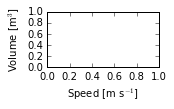

In [59]:
fig = plt.figure(figsize=(2, 1))
ax = fig.add_subplot(111)
ax.set_xlabel('Speed [m s$^{-1}$]')
ax.set_ylabel('Volume [m$^{3}$]')

# B. Line plot

(after explaining plot things in the first sections, show how they are used in the specific plots

legend and legend entries
keyword arguments: linewidth, plot markers, colors, line styles
multiple lines
two y axes

Line plots are useful for time series data. 

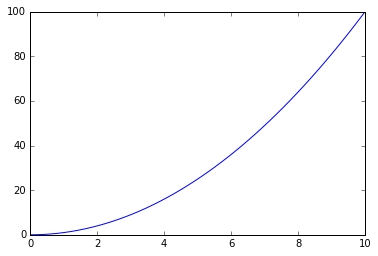

In [14]:
# set up plot fields
x = np.linspace(0, 10)
y = x**2

# set up figure
fig = plt.figure()
ax = fig.add_subplot(111)

# plot line
ax.plot(x, y)

---
## *Exercise*

> 4 x 2 line plots sharing both axes, with a suptitle, change limits, add legend, fontsize, linewidth, color. have them figure out how to have two y axes?
---

# C. Bar plot, histogram

---
## *Exercise*

> 
---

# D. 2D plots (scatter, quiver, pcolor, contour)

contour vs. contourf
colorbar


---
## *Exercise*

> 
---

# E. Advanced

animations
general good design practices - chartjunk, tufte, linestyles and widths, font size, colormaps
colormap: link to a few options like the matplotlib gallery of colormaps and my matplotlib doc page
subplots_adjust
overlaid axes
complex tiling
zoomed axes

---
## *Exercise*

> 
---

# F. Other plotting packages